# Optimize the Beale Function using AdaGrad

* [J. Duchi, et. al., Adaptive subgradient methods for online learning and stochastic optimization](http://jmlr.org/papers/v12/duchi11a.html)
* It adapts the learning rate to the parameters, performing smaller updates
(i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features.
* Previously, we performed an update for all parameters $\mathbf{w}$ at once as every parameter $\mathbf{w}_{i}$ used the same learning rate $\eta$.
* As Adagrad uses a different learning rate for every parameter $\mathbf{w}_{i}$ at every time step $t$.
* We first show Adagrad's per-parameter update, which we then vectorize.
* For brevity, we use $g_{t,i}$ to denote the gradient at time step $t$. 
$$ g_{t,i} = \frac{\partial \mathcal{L}(\mathbf{w}_{t, i})}{\partial \mathbf{w}_{t}} $$

* Naive Gradient Descent
$$\begin{align}
\mathbf{w}_{t+1,i} &= \mathbf{w}_{t,i} - \eta g_{t,i}\\
&= \mathbf{w}_{t,i} - \eta \frac{\partial \mathcal{L}(\mathbf{w}_{t, i})}{\partial \mathbf{w}_{t}}
\end{align}$$

* Adagrad
$$\begin{align}
\mathbf{w}_{t+1,i} &= \mathbf{w}_{t,i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}} g_{t,i}\\
&= \mathbf{w}_{t,i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}} \frac{\partial \mathcal{L}(\mathbf{w}_{t, i})}{\partial \mathbf{w}_{t}}
\end{align}$$

where $G_{t} \in \mathbb{R}^{d \times d}$ here is a diagonal matrix where each diagonal element $i,i$ is the sum of the squares of the gradients w.r.t. $\mathbf{w}_{i}$ up to time step $t$, while $\epsilon$ is a smoothing term that avoids division by zero (usually on the order of $1.0^{−8}$).

* $G_{t}$: the sum of the squares of the past gradients w.r.t. to all parameters $\mathbf{w}$ along its diagonal.

* Actual implementation of Adagrad (element-wise multiplication)
$$\begin{align}
\mathbf{w}_{t+1} &= \mathbf{w}_{t} - \frac{\eta}{\sqrt{G_{t} + \epsilon}} \odot g_{t}\\
&= \mathbf{w}_{t} - \frac{\eta}{\sqrt{G_{t} + \epsilon}} \odot \frac{\partial \mathcal{L}(\mathbf{w}_{t})}{\partial \mathbf{w}_{t}}
\end{align}$$

## Import

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

## Beale function

$$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

* analytic solution (global minima)
  * $(x, y) = (3, 0.5)$

In [2]:
f = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [3]:
def gradients(x, y):
  """Gradient of Beale function.

  Args:
    x: x-dimension of inputs
    y: y-dimension of inputs

  Returns:
    grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
      dx: gradient of Beale function with respect to x-dimension of inputs
      dy: gradient of Beale function with respect to y-dimension of inputs
  """
  dx = 2. * ( (1.5 - x + x * y) * (y - 1) + \
                (2.25 - x + x * y**2) * (y**2 - 1) + \
                (2.625 - x + x * y**3) * (y**3 - 1) )
  dy = 2. * ( (1.5 - x + x * y) * x + \
              (2.25 - x + x * y**2) * 2. * x * y + \
              (2.625 - x + x * y**3) * 3. * x * y**2 )
  grads = np.array([dx, dy])
  return grads

In [4]:
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
print("minima (1x2 row vector shape): {}".format(minima))
print("minima (2x1 column vector shape):")
print(minima_)

minima (1x2 row vector shape): [3.  0.5]
minima (2x1 column vector shape):
[[3. ]
 [0.5]]


In [5]:
# putting together our points to plot in a 3D plot
number_of_points = 50
margin = 4.5
x_min = 0. - margin
x_max = 0. + margin
y_min = 0. - margin
y_max = 0. + margin
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

### 3D plot with minima

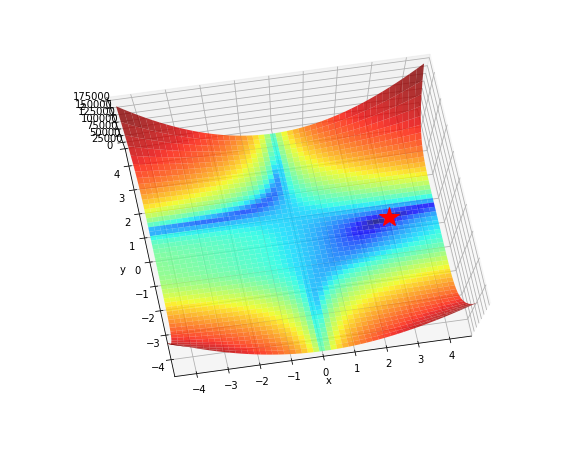

In [6]:
#%matplotlib inline
#%matplotlib notebook
#%pylab

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d', elev=80, azim=-100)

ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

#plt.draw()
plt.show()

### Contour plot with minima

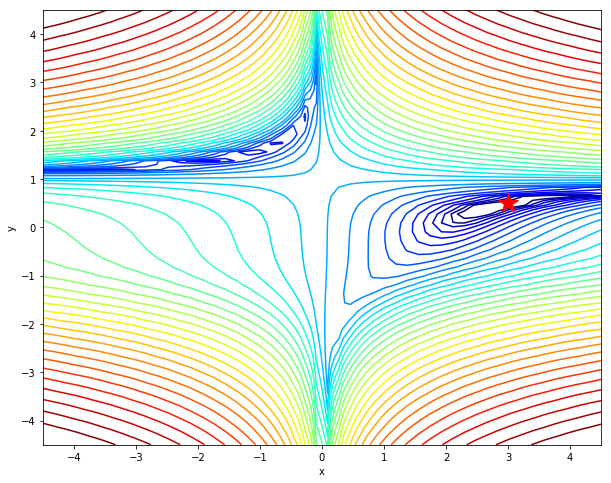

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

plt.show()

## Build a Optimizer

In [8]:
class AdagradOptimizer():
  def __init__(self, function, gradients, x_init=None, y_init=None, learning_rate=0.01, initial_accumulator_value=0.1):
    self.f = function
    self.g = gradients
    scale = 3.0
    self.vars = np.zeros([2])
    if x_init is not None:
      self.vars[0] = x_init
    else:
      self.vars[0] = np.random.uniform(low=-scale, high=scale)
    if y_init is not None:
      self.vars[1] = y_init
    else:
      self.vars[1] = np.random.uniform(low=-scale, high=scale)
    print("x_init: {:.3f}".format(self.vars[0]))
    print("y_init: {:.3f}".format(self.vars[1]))
    
    self.lr = learning_rate
    self.grads_squared = np.zeros([2])
    self.grads_squared.fill(initial_accumulator_value)
    self.epsilon = 1e-7
    
    # for accumulation of loss and path (w, b)
    self.z_history = []
    self.x_history = []
    self.y_history = []
  
  
  def func(self, variables):
    """Beale function.
    
    Args:
      variables: input data, shape: 1-rank Tensor (vector) np.array
        x: x-dimension of inputs
        y: y-dimension of inputs
      
    Returns:
      z: Beale function value at (x, y)
    """
    x, y = variables
    z = self.f(x, y)
    return z
  
  def gradients(self, variables):
    """Gradient of Beale function.
    
    Args:
      variables: input data, shape: 1-rank Tensor (vector) np.array
        x: x-dimension of inputs
        y: y-dimension of inputs
      
    Returns:
      grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
        dx: gradient of Beale function with respect to x-dimension of inputs
        dy: gradient of Beale function with respect to y-dimension of inputs
    """
    x, y = variables
    grads = self.g(x, y)
    return grads
  
  def weights_update(self, grads):
    """Weights update using adagrad.
    
      grads2 = grads2 + grads**2
      w' = w - lr * grads / (sqrt(grads2) + epsilon)
    """
    self.grads_squared = self.grads_squared + grads**2
    self.vars = self.vars - self.lr * grads / (np.sqrt(self.grads_squared) + self.epsilon)
    
  def history_update(self, z, x, y):
    """Accumulate all interesting variables
    """
    self.z_history.append(z)
    self.x_history.append(x)
    self.y_history.append(y)


  def train(self, max_steps):
    pre_z = 0.0
    print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(0, self.func(self.vars), self.x, self.y))
    
    file = open('adagrad.txt', 'w')
    file.write("{:.5f}  {:.5f}\n".format(self.x, self.y))
    
    for step in range(max_steps):
      self.z = self.func(self.vars)
      self.history_update(self.z, self.x, self.y)

      self.grads = self.gradients(self.vars)
      self.weights_update(self.grads)
      file.write("{:.5f}  {:.5f}\n".format(self.x, self.y))
      
      if (step+1) % 100 == 0:
        print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}  dx: {:.5f}  dy: {:.5f}".format(step+1, self.func(self.vars), self.x, self.y, self.dx, self.dy))
        
      if np.abs(pre_z - self.z) < 1e-7:
        print("Enough convergence")
        print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(step+1, self.func(self.vars), self.x, self.y))
        self.z = self.func(self.vars)
        self.history_update(self.z, self.x, self.y)
        break
        
      pre_z = self.z
    file.close()

    self.x_history = np.array(self.x_history)
    self.y_history = np.array(self.y_history)
    self.path = np.concatenate((np.expand_dims(self.x_history, 1), np.expand_dims(self.y_history, 1)), axis=1).T
    
    
  @property
  def x(self):
    return self.vars[0]
  
  @property
  def y(self):
    return self.vars[1]
  
  @property
  def dx(self):
    return self.grads[0]
  
  @property
  def dy(self):
    return self.grads[1]

### Create a `AdagradOptimizer()` class

In [9]:
opt = AdagradOptimizer(f, gradients, x_init=0.7, y_init=1.4, learning_rate=0.2)
#opt = AdagradOptimizer(f, gradients, x_init=None, y_init=None, learning_rate=0.01) # random initialize

x_init: 0.700
y_init: 1.400


### Training

In [10]:
%time
opt.train(1000)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 14.1 µs
steps: 0  z: 26.496662  x: 0.70000  y: 1.40000
steps: 100  z: 0.338911  x: 2.14354  y: 0.18408  dx: -0.93731  dy: -0.56666
steps: 200  z: 0.108152  x: 2.42362  y: 0.30963  dx: -0.39987  dy: -0.28433
steps: 300  z: 0.049661  x: 2.57021  y: 0.36819  dx: -0.24118  dy: -0.14802
steps: 400  z: 0.026951  x: 2.66398  y: 0.40155  dx: -0.16360  dy: -0.09186
steps: 500  z: 0.016056  x: 2.72983  y: 0.42330  dx: -0.11888  dy: -0.06278
steps: 600  z: 0.010143  x: 2.77876  y: 0.43863  dx: -0.09028  dy: -0.04557
steps: 700  z: 0.006670  x: 2.81648  y: 0.44999  dx: -0.07065  dy: -0.03444
steps: 800  z: 0.004514  x: 2.84633  y: 0.45870  dx: -0.05650  dy: -0.02680
steps: 900  z: 0.003121  x: 2.87040  y: 0.46555  dx: -0.04592  dy: -0.02131
steps: 1000  z: 0.002194  x: 2.89008  y: 0.47105  dx: -0.03779  dy: -0.01722


### Results

In [11]:
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.x, opt.y))

Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 2.8901  y: 0.4710


### Beale function plot

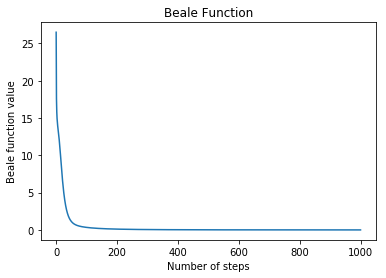

In [12]:
#Plot the Beale function
plt.title('Beale Function')
plt.xlabel('Number of steps')
plt.ylabel('Beale function value')
plt.plot(opt.z_history)
plt.show()

### Plot setting

In [13]:
# putting together our points to plot in a 3D plot
number_of_points = 50
margin = 4.5
x_min = 0. - margin
x_max = 0. + margin
y_min = 0. - margin
y_max = 0. + margin
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

### 3D plot with learning path

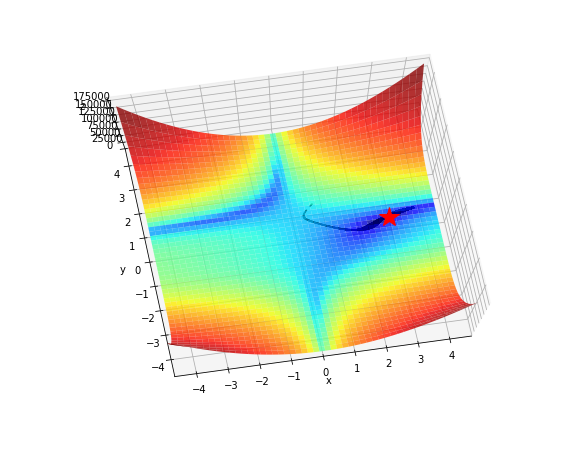

In [14]:
#%matplotlib inline
#%matplotlib notebook
#%pylab

path = opt.path

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d', elev=80, azim=-100)

ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=20)
ax.quiver(path[0,:-1], path[1,:-1], opt.func([*path[::,:-1]]),
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
          opt.func([*path[::,1:]]) - opt.func([*path[::,:-1]]),
          color='k', length=1, normalize=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

#plt.draw()
plt.show()

### Contour plot with learning path

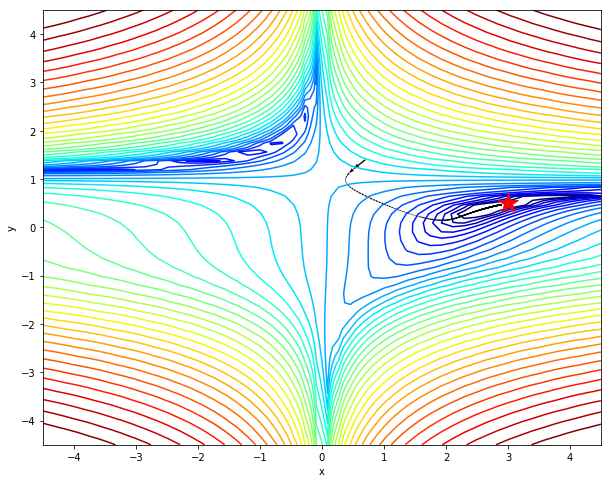

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

plt.show()